<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 8. Support Vector Machines: Implementación en regresión</span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

# SVM para Regresión

En este notebook exploramos una versión regresiva de las Máquinas de Vectores de Soporte: **Support Vector Regression (SVR)**. A diferencia de la clasificación, SVR busca ajustar una función que prediga un valor real, permitiendo ciertos errores dentro de una tolerancia $\varepsilon$. El objetivo es encontrar una función lo más plana posible que pase por la mayoría de los puntos, penalizando solo aquellos que se alejan más allá del margen $\varepsilon$.

Utilizaremos **datos sintéticos** y aplicaremos SVR con tres tipos de **kernels**: `lineal`, `radial` (RBF) y `polinómico`. Esto nos permitirá visualizar cómo cada kernel se adapta a la **no linealidad** de los datos y comparar sus resultados. Mantendremos el mismo valor del hiperparámetro `C`, que regula la penalización por errores fuera del margen, para asegurar una comparación justa entre modelos.

In [1]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

In [2]:
# Generación de una función con ruido

X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))

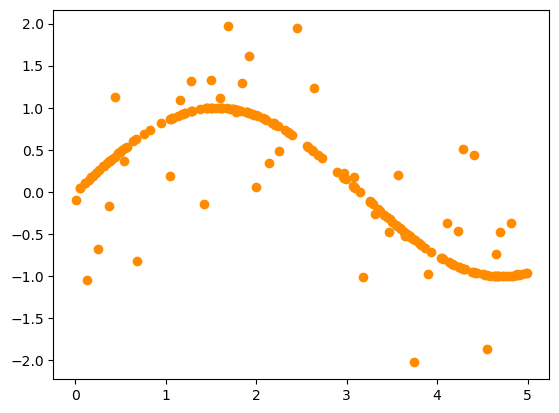

In [3]:
plt.scatter(X,Y, color="darkorange", label="data")
plt.show()

In [4]:
C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

In [5]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

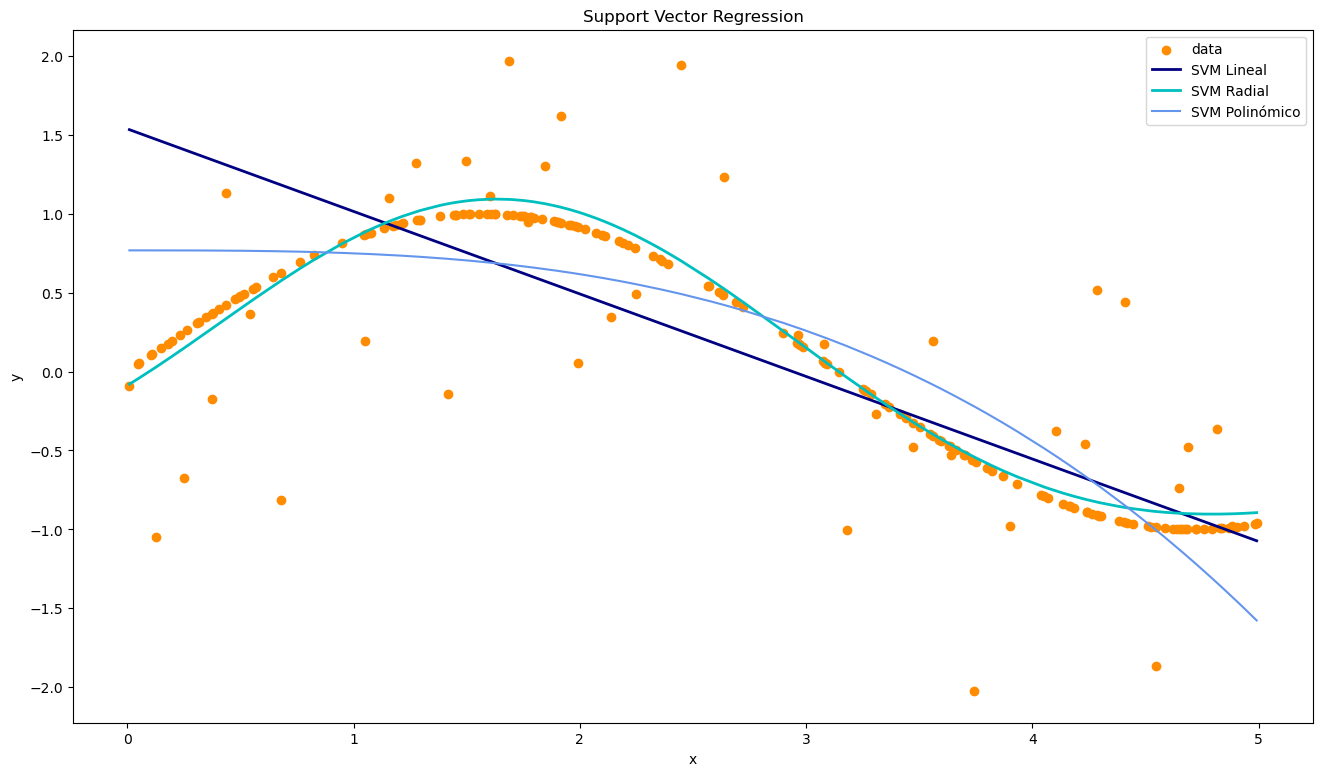

In [6]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()